In [24]:

import sklearn
import os 
import tifffile
from sklearn.feature_extraction import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
import os
import sys
import sknetwork as skn
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing


In [135]:
path = '20190607_083535_103c_3B_AnalyticMS_SR.tif'

In [136]:
img = tifffile.imread(path)
img.shape

(4517, 8928, 4)

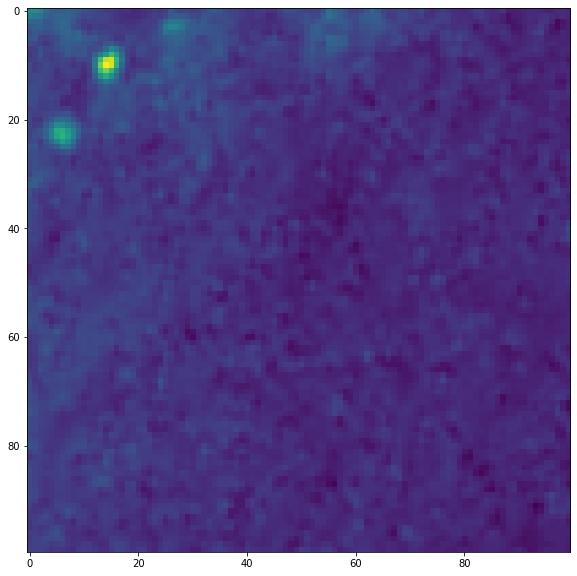

In [231]:
plt.figure(figsize = (10,10))
plt.imshow(img[990:1090,400:500,1])

In [232]:
img2 = img[990:1090,400:500]

In [233]:
img2.shape

(100, 100, 4)

In [7]:
def kmeans(arrays, nb_clust):
    arrays_flat=np.array([arrays[:,:,i].flatten() for i in range(arrays.shape[2])])
    X=(np.transpose(arrays_flat))
    kmeans = KMeans(n_clusters=nb_clust,  init='k-means++', n_init=10, max_iter=1000) # tester k-means méthod max?
    kmeans.fit(X)
    labels=kmeans.labels_
    clust = kmeans.cluster_centers_
    plastic_index = 0
    nb = 99999
    nb_2 = 0
    img_labels = labels.reshape(70,70)
    #img_labels = labels.reshape(84,183)
    
    plt.figure()
    plt.imshow(img_labels)
    plt.title('labels after kmeans')
    
    return img_labels,clust

In [8]:
def delete_land(img):
    labels,clust = kmeans(img, 2)
    spectral_sign = {'water': [ 0.10384066, 0.13632251, 0.16474463, 
       0.3045134], 'ground':[ 0.03796409, 0.03244987, 0.02011696, 0.01891139]
                    ,'plastic' : [0.03825 , 0.037625, 0.0334 , 0.055125]}
    d1 = distance.euclidean(clust[0], spectral_sign['ground'])
    d2 = distance.euclidean(clust[1], spectral_sign['ground'])
    ground_label = 100
     
    if d1<d2:
        ground_label = 1
    else : 
        ground_label = 0
        
    result = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if labels[i,j] == ground_label :
                result[i,j] = spectral_sign['water']
                #result[i,j+1] = spectral_sign['water']
                #result[i,j+2] = spectral_sign['water']

    plt.figure()  
    
    plt.imshow(result[:,:,0])
    plt.title('result')
    return result

In [25]:
arrays_flat=np.array([img2[:,:,i].flatten() for i in range(img2.shape[2])])
X =(np.transpose(arrays_flat))

In [26]:
from sklearn.decomposition import PCA

def perform_pca(X,n):
    pca = PCA(n_components=n, whiten = False)
    Xpca = pca.fit_transform(X )
    return(Xpca)

In [49]:
#X = perform_pca(X,0.35)
#X= preprocessing.normalize(X)



In [154]:
img2 = img2.astype('float32')

In [234]:
def scale(img):
    result = np.zeros(img.shape).astype('float32')
    for band in range(img.shape[2]):
        mean = float(np.mean(img[:,:,band]))
        std = float(np.std(img[:,:,band]))
        print(std)
        result[:,:,band] = (img[:,:,band] - mean)/std
    return(img)
        
result = scale(img2)
        
        
    

20.924781694440686
21.552857992386997
21.41165189236926
29.32504006817382


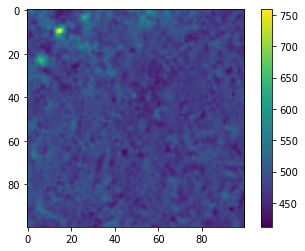

In [235]:
plt.imshow(result[:,:,0])
plt.colorbar()

In [239]:
arrays_flat=np.array([result[:,:,i].flatten() for i in range(result.shape[2])])
X =(np.transpose(arrays_flat))

(array([1.980e+02, 4.738e+03, 4.586e+03, 3.950e+02, 4.900e+01, 1.600e+01,
        1.100e+01, 3.000e+00, 0.000e+00, 4.000e+00]),
 array([412. , 446.7, 481.4, 516.1, 550.8, 585.5, 620.2, 654.9, 689.6,
        724.3, 759. ]),
 <BarContainer object of 10 artists>)

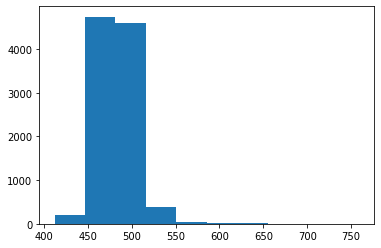

In [240]:
plt.hist(result[:,:,0].flatten())

In [241]:
import time

In [301]:
nb_cluster = 2
start = time.time()
clustering0 = SpectralClustering(n_clusters=nb_cluster, n_components = 10,random_state = 42,n_init = 100,verbose = True,assign_labels = 'kmeans', affinity = 'nearest_neighbors' ,  n_neighbors = 50).fit(X)
end = time.time()

print('time : ' , end - start)

Computing label assignment using kmeans
Initialization complete
Iteration 0, inertia 0.25986654802685
Iteration 1, inertia 0.17193166457443276
Iteration 2, inertia 0.1710721655657211
Iteration 3, inertia 0.17075445983732335
Iteration 4, inertia 0.17065034224730835
Iteration 5, inertia 0.17060221972159148
Iteration 6, inertia 0.1705720059088735
Iteration 7, inertia 0.1705451477331409
Iteration 8, inertia 0.17050080125242864
Iteration 9, inertia 0.17044830230300706
Iteration 10, inertia 0.1704160057185372
Iteration 11, inertia 0.17038927022851988
Iteration 12, inertia 0.17036150703561498
Iteration 13, inertia 0.17034096126207732
Iteration 14, inertia 0.17032707823328663
Iteration 15, inertia 0.17031858607092973
Iteration 16, inertia 0.17031245720864702
Iteration 17, inertia 0.17030512273566903
Iteration 18, inertia 0.17029712609789255
Iteration 19, inertia 0.17028741588366103
Iteration 20, inertia 0.17027901523420985
Iteration 21, inertia 0.17026298732990253
Iteration 22, inertia 0.17021

Iteration 11, inertia 0.17042274895052814
Iteration 12, inertia 0.17039867905052625
Iteration 13, inertia 0.17037692014642178
Iteration 14, inertia 0.17035866445342313
Iteration 15, inertia 0.1703399412675326
Iteration 16, inertia 0.17032794651976246
Iteration 17, inertia 0.17031772681801455
Iteration 18, inertia 0.17030834844498172
Iteration 19, inertia 0.17029902909433375
Iteration 20, inertia 0.17029171651816452
Iteration 21, inertia 0.1702851630065788
Iteration 22, inertia 0.17028093755671075
Iteration 23, inertia 0.17027865390066968
Iteration 24, inertia 0.17027462860213344
Iteration 25, inertia 0.17027221928503797
Converged at iteration 25: center shift 1.548551108152671e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.28438701080742906
Iteration 1, inertia 0.1716501976671924
Iteration 2, inertia 0.1707170652604139
Iteration 3, inertia 0.17058841830148672
Iteration 4, inertia 0.17055615511421918
Iteration 5, inertia 0.17053141979245273
I

Converged at iteration 19: center shift 1.0511814511946825e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.3259315883057035
Iteration 1, inertia 0.17301908621346354
Iteration 2, inertia 0.17217605364618865
Iteration 3, inertia 0.171537588724141
Iteration 4, inertia 0.1711176283444559
Iteration 5, inertia 0.17086561820057988
Iteration 6, inertia 0.17075820056680793
Iteration 7, inertia 0.17072944516217836
Iteration 8, inertia 0.17071926302261037
Iteration 9, inertia 0.1707152536289176
Iteration 10, inertia 0.17071236768743053
Iteration 11, inertia 0.17071051973647267
Iteration 12, inertia 0.17070922527917154
Converged at iteration 12: center shift 1.32164712371702e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.24408455592465966
Iteration 1, inertia 0.17191661232649605
Iteration 2, inertia 0.171707781653469
Iteration 3, inertia 0.17164909591957114
Iteration 4, inertia 0.17161265898507927
Iteration 5,

Iteration 26, inertia 0.17083753767034296
Iteration 27, inertia 0.17083621886509132
Iteration 28, inertia 0.17083482474204081
Converged at iteration 28: center shift 1.1763651260330405e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.258784722623294
Iteration 1, inertia 0.17129653000749206
Iteration 2, inertia 0.17100502874997908
Iteration 3, inertia 0.17091202755860496
Iteration 4, inertia 0.17078398594620897
Iteration 5, inertia 0.17063059799085878
Iteration 6, inertia 0.17051425160233702
Iteration 7, inertia 0.1703858910646627
Iteration 8, inertia 0.17025846307137335
Iteration 9, inertia 0.17018283554851582
Iteration 10, inertia 0.17014794583906281
Iteration 11, inertia 0.17011883272548878
Iteration 12, inertia 0.17009334118234742
Iteration 13, inertia 0.17007365899203683
Iteration 14, inertia 0.1700608431093046
Iteration 15, inertia 0.17005209565828464
Iteration 16, inertia 0.1700478693898613
Iteration 17, inertia 0.17004513087764744
Itera

Iteration 2, inertia 0.17064387896386435
Iteration 3, inertia 0.17018569265674935
Iteration 4, inertia 0.17008671881000004
Iteration 5, inertia 0.17002721937304813
Iteration 6, inertia 0.16998166380831237
Iteration 7, inertia 0.16994899891354803
Iteration 8, inertia 0.1699317131480845
Iteration 9, inertia 0.1699212749560613
Iteration 10, inertia 0.16991322879727552
Iteration 11, inertia 0.16990761399520718
Iteration 12, inertia 0.16990508464310006
Iteration 13, inertia 0.16990361456214406
Iteration 14, inertia 0.16990235703872647
Iteration 15, inertia 0.16990175918995254
Converged at iteration 15: center shift 7.107692801237129e-12 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.2769662240152341
Iteration 1, inertia 0.1715807026143633
Iteration 2, inertia 0.17088126561746944
Iteration 3, inertia 0.17071543020172725
Iteration 4, inertia 0.170669179667669
Iteration 5, inertia 0.17063959768249232
Iteration 6, inertia 0.1706070060765296
Iteration 7, 

Iteration 16, inertia 0.17049828420025356
Iteration 17, inertia 0.17049504609965185
Iteration 18, inertia 0.17049073031033674
Iteration 19, inertia 0.1704858407466008
Iteration 20, inertia 0.17048197095207604
Iteration 21, inertia 0.17047796596995884
Iteration 22, inertia 0.1704714967619608
Iteration 23, inertia 0.17046820253772843
Iteration 24, inertia 0.17046414092958584
Iteration 25, inertia 0.17045901086783077
Iteration 26, inertia 0.17045242496331206
Iteration 27, inertia 0.17044205260522804
Iteration 28, inertia 0.1704290777024826
Iteration 29, inertia 0.17041819784804074
Iteration 30, inertia 0.17040732611780182
Iteration 31, inertia 0.17040134130798482
Iteration 32, inertia 0.1703967219991741
Iteration 33, inertia 0.1703933422300823
Iteration 34, inertia 0.1703912516395037
Iteration 35, inertia 0.17038933999192
Iteration 36, inertia 0.17038734927448868
Iteration 37, inertia 0.17038400869233256
Iteration 38, inertia 0.1703804190390545
Iteration 39, inertia 0.17037798260329645
It

Iteration 11, inertia 0.17062286456600992
Iteration 12, inertia 0.17061625185273122
Iteration 13, inertia 0.17061155536196754
Iteration 14, inertia 0.17060611784206925
Iteration 15, inertia 0.17059998474155275
Iteration 16, inertia 0.1705963289483398
Iteration 17, inertia 0.17059407540299348
Iteration 18, inertia 0.17059207510096122
Iteration 19, inertia 0.17058974987702435
Iteration 20, inertia 0.17058662938504815
Iteration 21, inertia 0.17058416296227844
Iteration 22, inertia 0.1705825313371052
Converged at iteration 22: center shift 1.2254913710901663e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.24156129095796464
Iteration 1, inertia 0.17245057428865207
Iteration 2, inertia 0.17224900980572785
Iteration 3, inertia 0.17212735592521508
Iteration 4, inertia 0.17204096584389458
Iteration 5, inertia 0.17198467417582297
Iteration 6, inertia 0.17193842586282188
Iteration 7, inertia 0.17190886796180185
Iteration 8, inertia 0.1718821020652853
It

Iteration 26, inertia 0.1703483806111842
Iteration 27, inertia 0.17034000634278576
Iteration 28, inertia 0.17032689552024816
Iteration 29, inertia 0.17031583863694152
Iteration 30, inertia 0.1703029435663511
Iteration 31, inertia 0.17028468664503574
Iteration 32, inertia 0.17025558992978646
Iteration 33, inertia 0.17022089898049161
Iteration 34, inertia 0.1701778839218526
Iteration 35, inertia 0.17013615196191778
Iteration 36, inertia 0.17010212023640056
Iteration 37, inertia 0.1700784789668938
Iteration 38, inertia 0.17006091121639058
Iteration 39, inertia 0.17004756446364633
Iteration 40, inertia 0.17003976940415125
Iteration 41, inertia 0.1700347456432831
Iteration 42, inertia 0.17003142712469055
Iteration 43, inertia 0.17002913648249235
Iteration 44, inertia 0.17002706096624207
Iteration 45, inertia 0.1700260625220161
Converged at iteration 45: center shift 1.1188431485781923e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.286677963333312

Iteration 9, inertia 0.17120202829185782
Iteration 10, inertia 0.1711067009115462
Iteration 11, inertia 0.17104028166514487
Iteration 12, inertia 0.17099767512203054
Iteration 13, inertia 0.17097077961569793
Iteration 14, inertia 0.17095353452428938
Iteration 15, inertia 0.17094055482223114
Iteration 16, inertia 0.17092773681887954
Iteration 17, inertia 0.17091241379469085
Iteration 18, inertia 0.1708991430057539
Iteration 19, inertia 0.17089066501015682
Iteration 20, inertia 0.17088658747158708
Converged at iteration 20: center shift 1.4916929570722828e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.27506559453598667
Iteration 1, inertia 0.1712522753157744
Iteration 2, inertia 0.17091246568634266
Iteration 3, inertia 0.170637754163992
Iteration 4, inertia 0.17045704943874815
Iteration 5, inertia 0.17035973364090856
Iteration 6, inertia 0.1702907637724176
Iteration 7, inertia 0.170241528008643
Iteration 8, inertia 0.17020041582458267
Iteratio

Iteration 11, inertia 0.16972000721245875
Iteration 12, inertia 0.1696928596066272
Iteration 13, inertia 0.16966221502872825
Iteration 14, inertia 0.16963080625802227
Iteration 15, inertia 0.16959909765209213
Iteration 16, inertia 0.16956961968964457
Iteration 17, inertia 0.16953925068574505
Iteration 18, inertia 0.1695097466913391
Iteration 19, inertia 0.16949322427444047
Iteration 20, inertia 0.169483661003532
Iteration 21, inertia 0.16947577295902644
Iteration 22, inertia 0.1694702428431003
Iteration 23, inertia 0.16946468064891435
Iteration 24, inertia 0.16946105409919754
Iteration 25, inertia 0.16945969861436738
Iteration 26, inertia 0.16945854604079735
Iteration 27, inertia 0.1694574355607054
Converged at iteration 27: center shift 7.286300252375057e-11 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.2349299429792739
Iteration 1, inertia 0.17207022962550764
Iteration 2, inertia 0.17160337736201048
Iteration 3, inertia 0.17138703881626197
It

Iteration 7, inertia 0.16998507091295176
Iteration 8, inertia 0.16996229517805284
Iteration 9, inertia 0.1699486886894023
Iteration 10, inertia 0.1699380554166151
Iteration 11, inertia 0.16992748091883284
Iteration 12, inertia 0.169922626504317
Iteration 13, inertia 0.16991832259168704
Iteration 14, inertia 0.16991583640613958
Iteration 15, inertia 0.16991337565573184
Iteration 16, inertia 0.1699107941802032
Iteration 17, inertia 0.16990863697156325
Iteration 18, inertia 0.1699065182243574
Iteration 19, inertia 0.16990473276820636
Iteration 20, inertia 0.1699023990392117
Iteration 21, inertia 0.1699015018693641
Converged at iteration 21: center shift 1.6784219252189005e-10 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.2510996332760966
Iteration 1, inertia 0.16889870172367502
Iteration 2, inertia 0.16855209445899452
Iteration 3, inertia 0.16847818680392862
Iteration 4, inertia 0.1684708102251093
Iteration 5, inertia 0.16846648106258663
Iteration

Iteration 11, inertia 0.17054347662957903
Iteration 12, inertia 0.17052937090786915
Iteration 13, inertia 0.17051913287141968
Iteration 14, inertia 0.17051012503014354
Iteration 15, inertia 0.17049994349476755
Iteration 16, inertia 0.1704905964876809
Iteration 17, inertia 0.17047872928932264
Iteration 18, inertia 0.17046636773454965
Iteration 19, inertia 0.17045773473314355
Iteration 20, inertia 0.17044796974936313
Iteration 21, inertia 0.1704365885202831
Iteration 22, inertia 0.17042880338729668
Iteration 23, inertia 0.17042269068527816
Iteration 24, inertia 0.1704177198663547
Iteration 25, inertia 0.1704138245061571
Iteration 26, inertia 0.17041050544240055
Iteration 27, inertia 0.1704064894773811
Iteration 28, inertia 0.17040344313939584
Iteration 29, inertia 0.1704012066328436
Iteration 30, inertia 0.17039953752944723
Converged at iteration 30: center shift 9.416575552679807e-11 within tolerance 1.8625103307720126e-10.
Initialization complete
Iteration 0, inertia 0.2572224909930715

In [303]:
img_labels0 = clustering0.labels_.reshape(100,100)

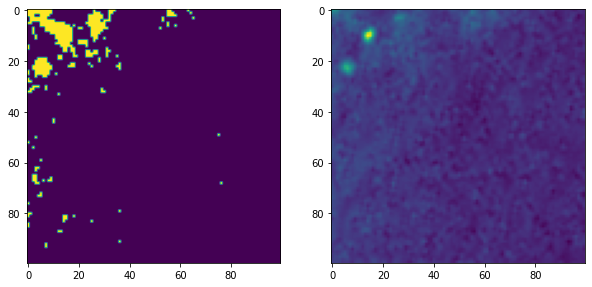

In [278]:
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(img_labels0)
plt.subplot(122)
plt.imshow(img2[:,:,1])

In [247]:
def compteur(N):
    res = np.zeros((100,100))
    for i in range(N):
        nb_cluster = 2
        clustering0 = SpectralClustering(n_clusters=nb_cluster, n_components = 10, affinity = 'nearest_neighbors' ,  n_neighbors = 50).fit(X)
        res += clustering0.labels_.reshape(100,100)
    #res = np.where(res > 8,0,res)
    plt.imshow(res)
    plt.colorbar()
    return res

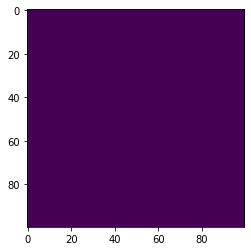

In [260]:
res = np.where(res > 1,0,res)
plt.imshow(res)

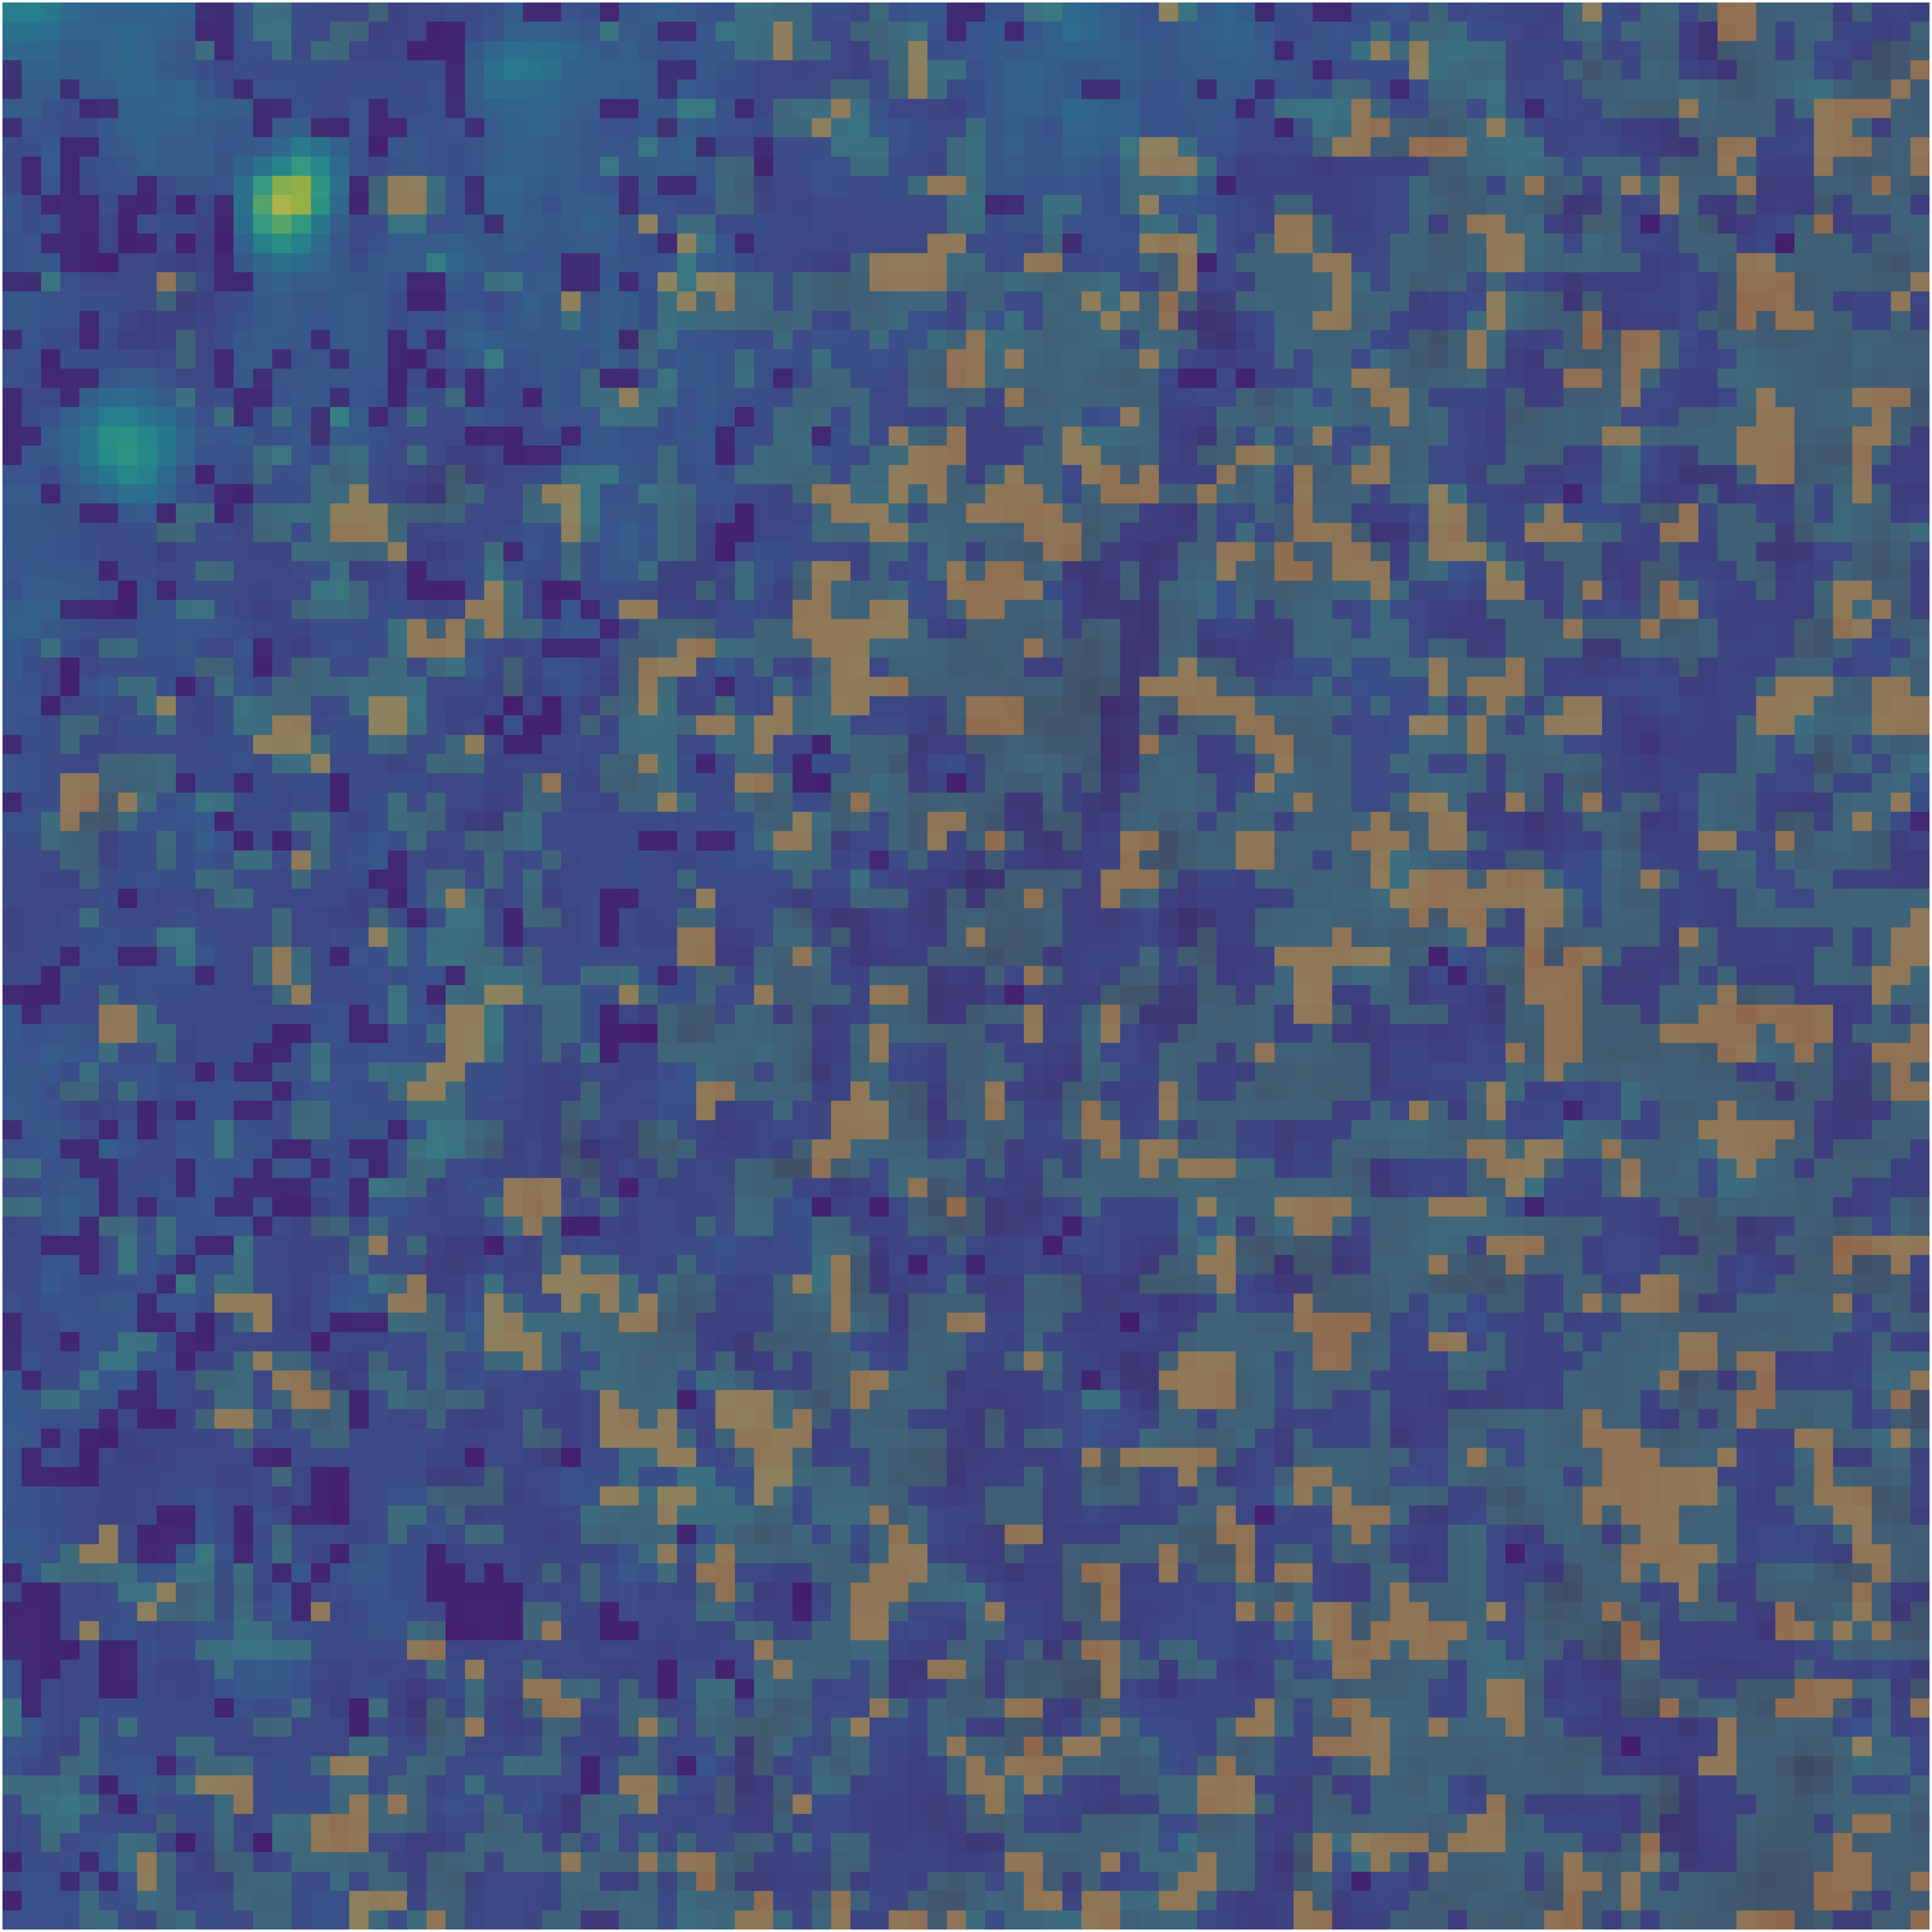

In [249]:

fig, ax = plt.subplots(figsize = (100,100))
ax.imshow(img2[:,:,1])
ax.imshow(res[:,:], alpha=0.4)
ax.set_axis_off()

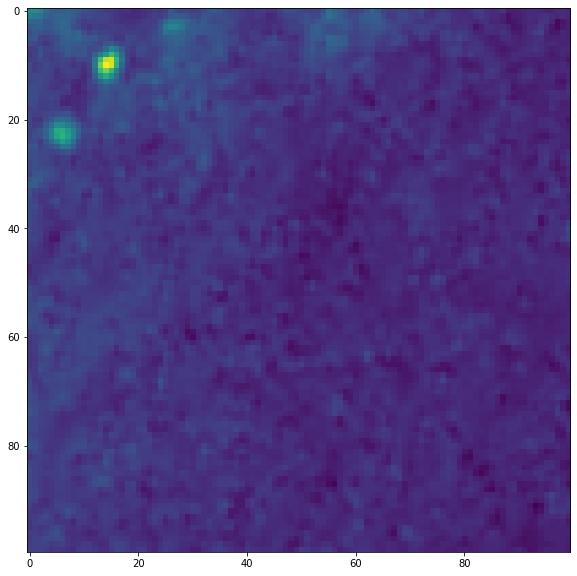

In [280]:
plt.figure(figsize = (10,10))
plt.imshow(img2[:,:,1])

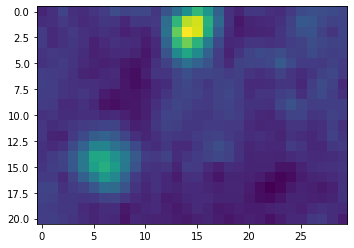

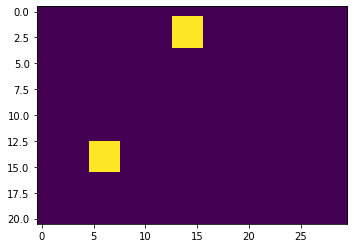

In [298]:
plt.figure(1)
plt.imshow(img2[8:29,:30,1])
label = np.zeros(img2.shape[:2])
label[9:12,13:16] = 1
label[21:24,5:8] = 1

plt.figure(2)
plt.imshow(label[8:29,:30])

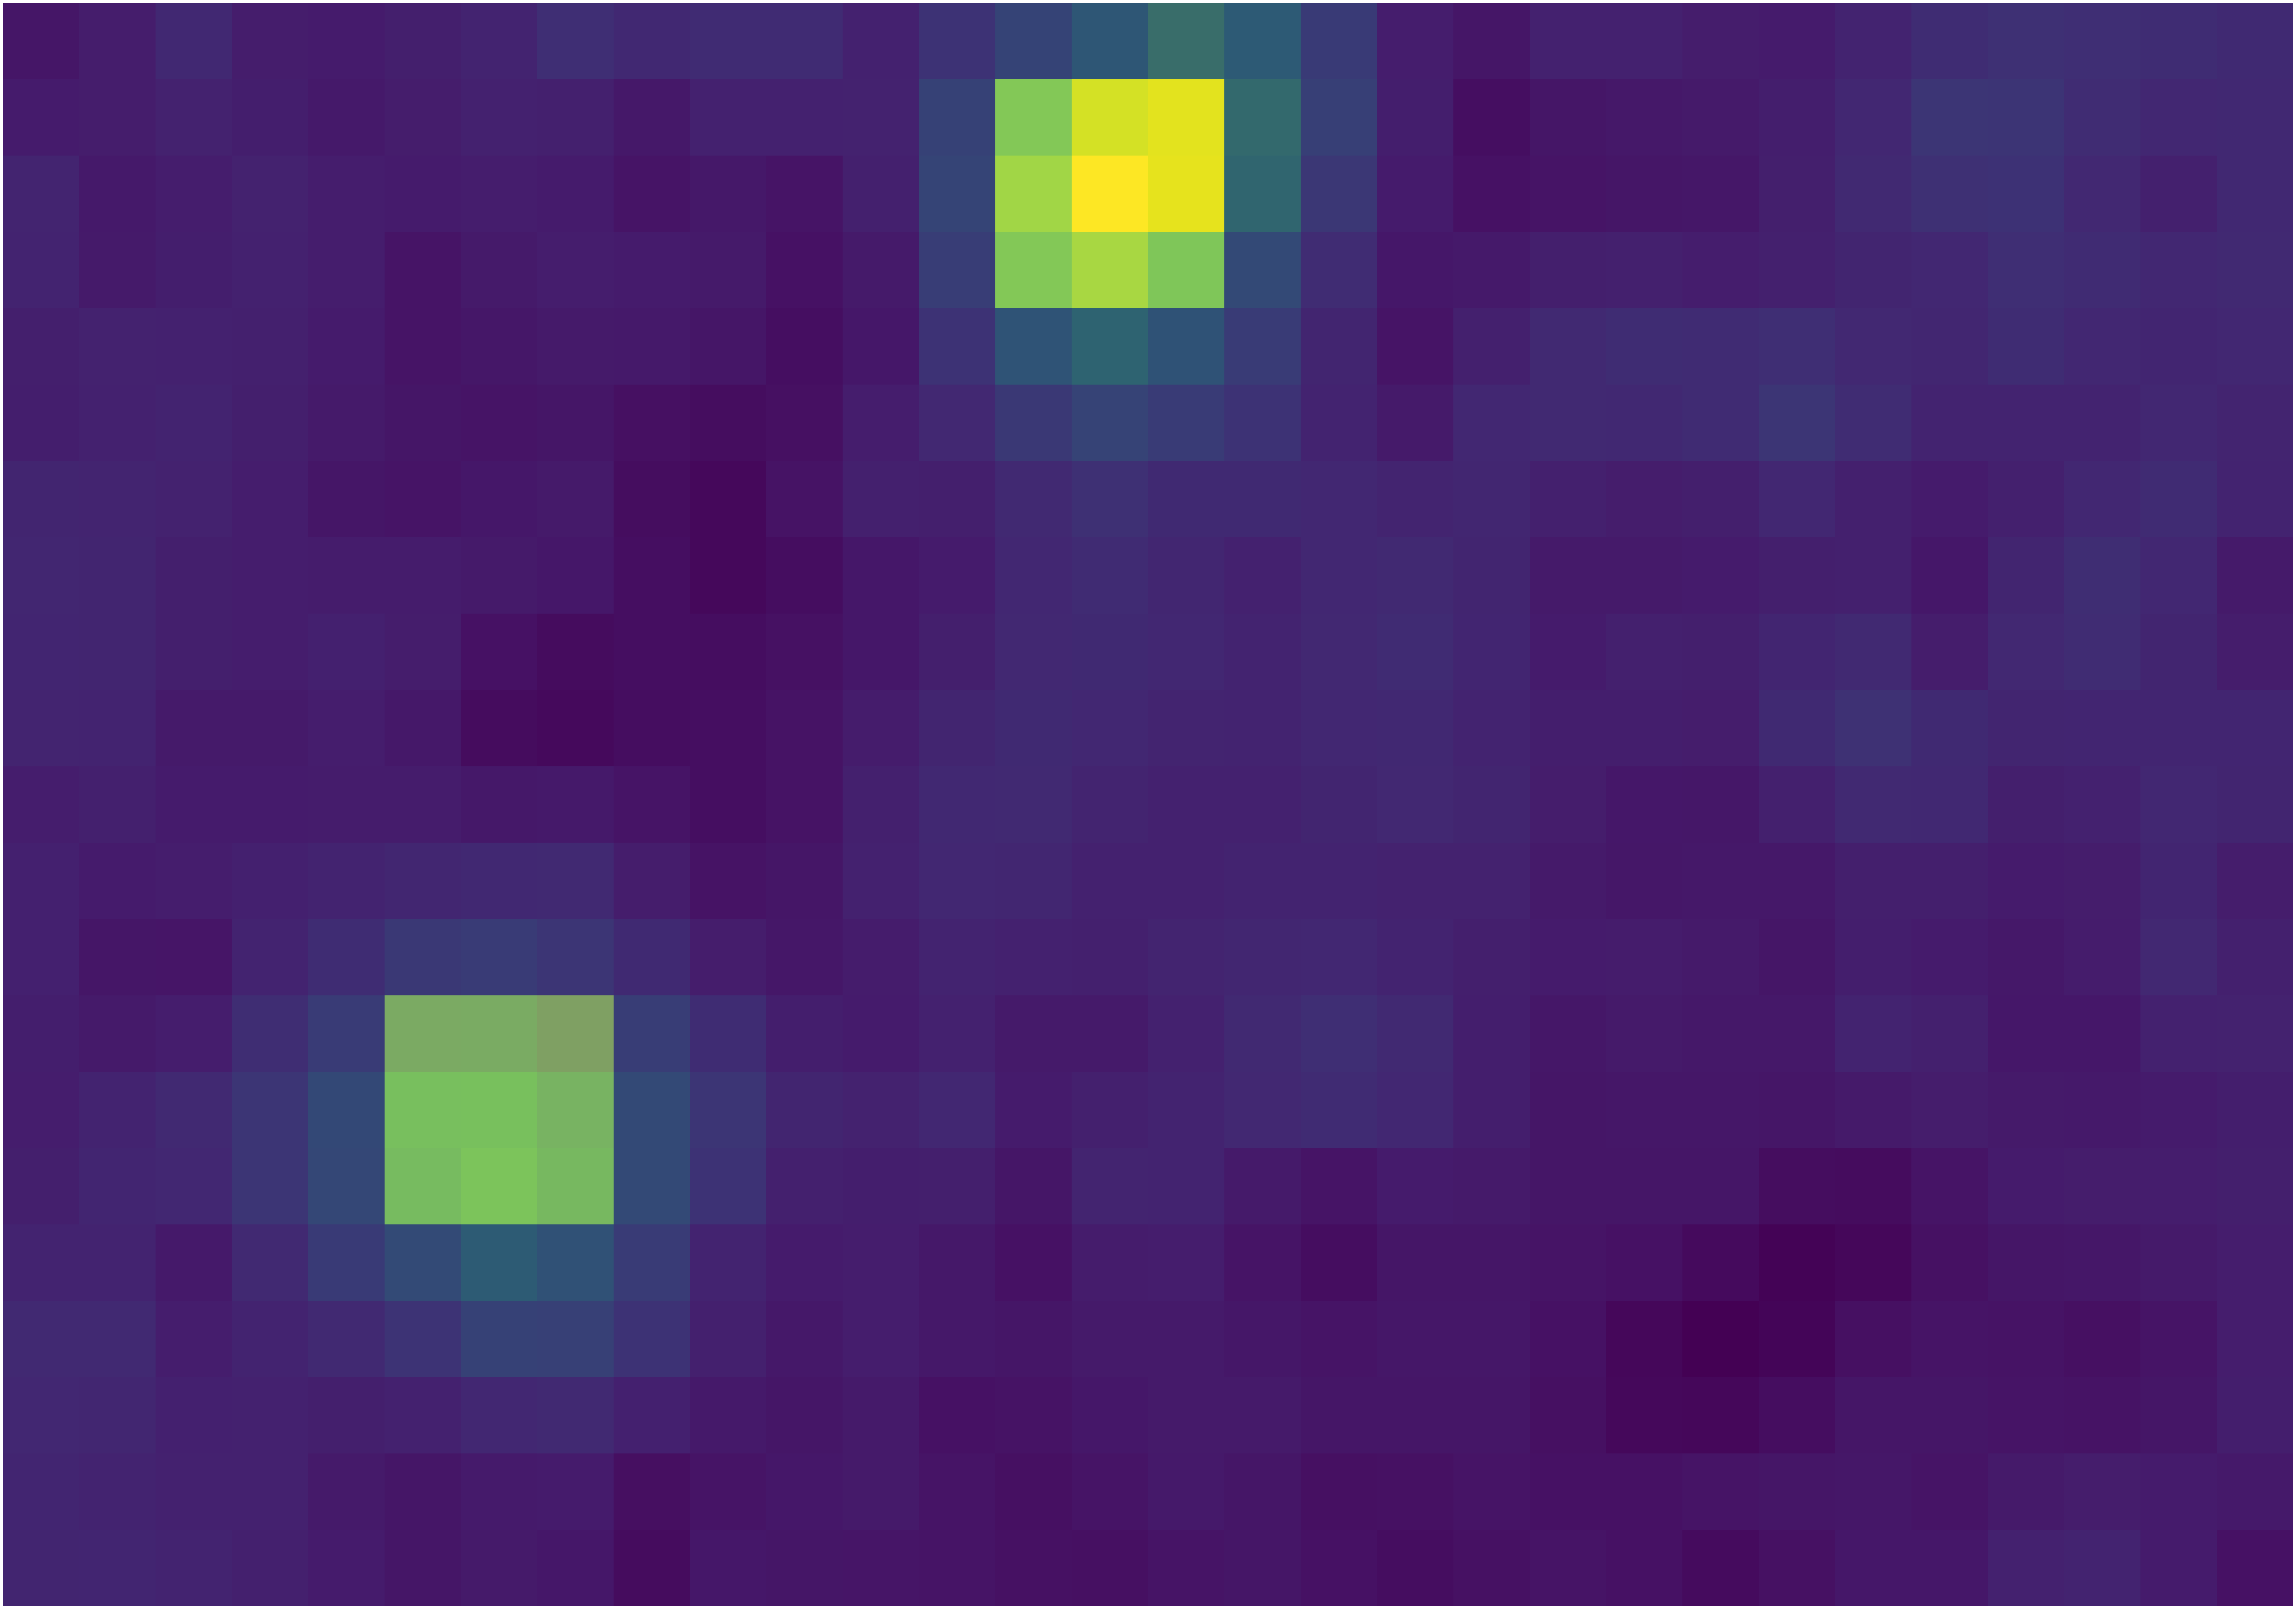

In [300]:
fig, ax = plt.subplots(figsize = (100,100))
ax.imshow(img2[8:29,:30,1])
ax.imshow(label[8:29,:30], alpha=0.4)
ax.set_axis_off()

In [304]:
from sklearn.metrics import jaccard_score

flat_label = label.flatten()
flat_pred = img_labels0.flatten()

print(jaccard_score(flat_label, flat_pred))

0.0782608695652174
